<a href="https://colab.research.google.com/github/Himanshut504/Credit-card-default-prediction-/blob/main/Credit_Card_Default_Prediction_Capstone_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [ ]:
#Importing lbrary 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, plot_precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data='https://raw.githubusercontent.com/Himanshut504/Credit-card-default-prediction-/main/default%20of%20credit%20card%20clients.csv'


In [ ]:
#reading data
df=pd.read_csv(data)

# Data inspection

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
#checking information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
#checking null values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

**No null value found**

In [ ]:
#describing data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [ ]:
#checking 1st Row
df.iloc[0,:]

ID                                1
LIMIT_BAL                     20000
SEX                               2
EDUCATION                         2
MARRIAGE                          1
AGE                              24
PAY_0                             2
PAY_2                             2
PAY_3                            -1
PAY_4                            -1
PAY_5                            -2
PAY_6                            -2
BILL_AMT1                      3913
BILL_AMT2                      3102
BILL_AMT3                       689
BILL_AMT4                         0
BILL_AMT5                         0
BILL_AMT6                         0
PAY_AMT1                          0
PAY_AMT2                        689
PAY_AMT3                          0
PAY_AMT4                          0
PAY_AMT5                          0
PAY_AMT6                          0
default payment next month        1
Name: 0, dtype: int64

In [ ]:
#droping Id Column since its is unique for every row
df=df.drop('ID',axis=1)

In [ ]:
#viewing Data

df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Data cleaning

In [ ]:
df['LIMIT_BAL'].max()

1000000

In [ ]:
df['LIMIT_BAL'].min()

10000

In [ ]:
#renaming dependendent Variable
df.rename(columns={'default payment next month' : 'Defaulters'}, inplace=True)

In [ ]:
# renaming some feature name for better understanding of feature
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)

df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)

df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulters
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Looking for Outlier Using Isolation Forest

In [ ]:
# importing minmax scaler
from sklearn.preprocessing import MinMaxScaler
#creating instance of minmaxscaler
minmax = MinMaxScaler(feature_range=(0, 1))
scale_df = minmax.fit_transform(df.drop('Defaulters',axis=1))

In [ ]:
#imprting IsolationForeest for outlier detection
from sklearn.ensemble import IsolationForest

In [ ]:
#creating instance of isolation forest
clf = IsolationForest(n_estimators=100, contamination=0.01, random_state=0)
clf.fit(scale_df)

# predict raw anomaly score
df['multivariate_anomaly_score'] = clf.decision_function(scale_df)
        
# prediction of a datapoint category outlier or inlier
df['multivariate_outlier'] = clf.predict(scale_df)

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulters,multivariate_anomaly_score,multivariate_outlier
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,689,0,0,0,0,1,0.190476,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3261,0,1000,1000,1000,0,2000,1,0.212437,1
2,90000,2,2,2,34,0,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0.269715,1
3,50000,2,2,1,37,0,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0.264108,1
4,50000,1,2,1,57,-1,0,-1,0,0,...,19131,2000,36681,10000,9000,689,679,0,0.171549,1


In [ ]:
#looking the outlier
df[(df['multivariate_outlier'] == -1)]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulters,multivariate_anomaly_score,multivariate_outlier
6,500000,1,1,2,29,0,0,0,0,0,...,473944,55000,40000,38000,20239,13750,13770,0,-0.051680,-1
59,400000,2,2,1,29,0,0,0,0,0,...,364089,17000,15029,30000,12000,12000,23000,0,-0.015094,-1
102,480000,1,1,1,63,0,0,0,2,2,...,469961,16078,55693,17000,0,18000,24200,0,-0.078952,-1
214,470000,1,2,2,27,2,2,2,2,0,...,309959,13000,11001,0,10484,10838,10367,0,-0.024130,-1
360,500000,2,2,2,23,4,3,2,0,0,...,419643,10000,0,14000,16500,16000,19000,1,-0.073918,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29605,500000,1,1,1,37,0,0,2,0,0,...,356636,40024,325,15296,12137,12312,14113,0,-0.047464,-1
29820,400000,1,2,2,37,1,-1,0,0,0,...,271385,423903,15100,14600,13000,9500,9500,0,-0.057618,-1
29837,500000,1,1,2,34,0,0,0,0,0,...,424592,17438,18852,16673,15244,15216,16037,0,-0.032132,-1
29883,420000,1,1,1,34,0,0,0,0,0,...,489200,20000,24000,11000,10000,0,11000,0,-0.028768,-1


In [ ]:
#removing Outliers
df=df.drop( df[ df['multivariate_outlier'] == -1 ].index)

In [ ]:
#checking the shape of df after removing outlier
df.shape

(29700, 26)

# Exploratory Data Analysis and feature Engineering

In [ ]:
#checking dependent valriable
df['Defaulters'].value_counts()

0    23154
1     6546
Name: Defaulters, dtype: int64

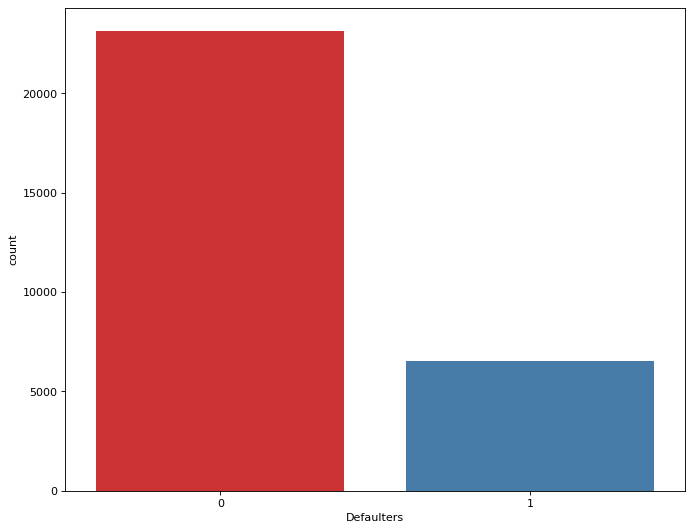

In [ ]:
#visualizing dependent variable
plt.figure(figsize=(10,8),dpi=80)
sns.countplot(x='Defaulters',data=df,palette='Set1')

**We can see that we have quite imbalance dataset**

## Bivariate Analysis

In [ ]:
#analysing categorical variable
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [ ]:
#creating different df for categorical variable
df_cat = df[categorical_features]


In [ ]:
#checking shape of categorical variable
df_cat.shape

(29700, 3)

In [ ]:
#looking into categorical df
df_cat.head()

,SEX,EDUCATION,MARRIAGE
0,2,2,1
1,2,2,2
2,2,2,2
3,2,2,1
4,1,2,1


In [ ]:
#checking value counts of categorical_features
for column_name in df_cat.columns:
  print(f'count of {column_name} features')
  print(f'\n{df_cat[column_name].value_counts()}\n')

count of SEX features

2    17963
1    11737
Name: SEX, dtype: int64

count of EDUCATION features

2    13922
1    10437
3     4885
5      271
4      123
6       48
0       14
Name: EDUCATION, dtype: int64

count of MARRIAGE features

2    15838
1    13486
3      322
0       54
Name: MARRIAGE, dtype: int64



In [ ]:
#maping numerical value to categorical for easy understanding
df_cat['SEX']=df_cat['SEX'].map({1:'Male',2:'Female'})
df_cat['EDUCATION']=df_cat['EDUCATION'].map({1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'other',5:'other',6:'other',0:'other'})
df_cat['MARRIAGE']=df_cat['MARRIAGE'].map({1 : 'married', 2 : 'single', 3 : 'others',0 : 'others'})

In [ ]:
df_cat.head()

,SEX,EDUCATION,MARRIAGE
0,Female,university,married
1,Female,university,single
2,Female,university,single
3,Female,university,married
4,Male,university,married


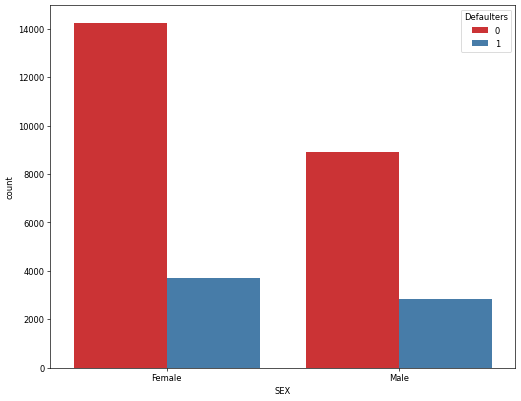

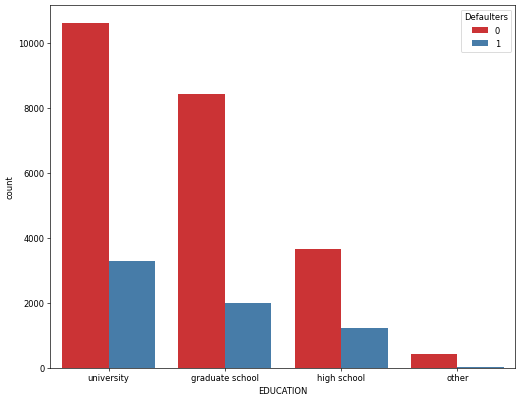

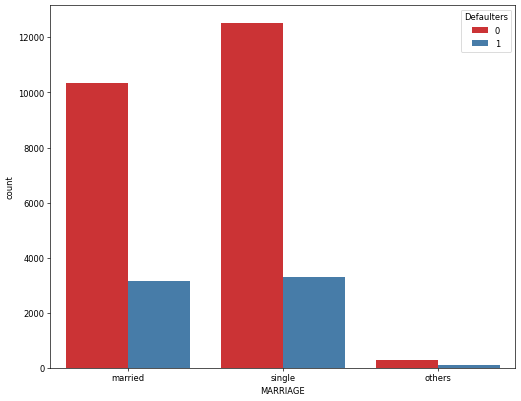

In [ ]:
#ploting count plot of  categorical df
for column_name in df_cat.columns:
  plt.figure(figsize=(10,8),dpi=60)
  sns.countplot(x=column_name,data=df_cat,hue=df['Defaulters'],palette='Set1')
  plt.show()

In [ ]:
#checking value counts of categorical_features
for column_name in df_cat.columns:
  print(f'count of {column_name} features')
  print(f'\n{df_cat[column_name].value_counts()}\n')

count of SEX features

Female    17963
Male      11737
Name: SEX, dtype: int64

count of EDUCATION features

university         13922
graduate school    10437
high school         4885
other                456
Name: EDUCATION, dtype: int64

count of MARRIAGE features

single     15838
married    13486
others       376
Name: MARRIAGE, dtype: int64



In [ ]:
#creating defaulter variable on df_cat
df_cat['Defaulter'] = df['Defaulters']

In [ ]:
df_cat.head()

,SEX,EDUCATION,MARRIAGE,Defaulter
0,Female,university,married,1
1,Female,university,single,1
2,Female,university,single,0
3,Female,university,married,0
4,Male,university,married,0


In [ ]:
#checking the defaulter ratio of categories
for column_name in df_cat.columns[:-1]:
  print(df_cat[['Defaulter',column_name]].groupby(column_name).mean().reset_index())

      SEX  Defaulter
0  Female   0.206981
1    Male   0.240947
         EDUCATION  Defaulter
0  graduate school   0.191722
1      high school   0.251382
2            other   0.070175
3       university   0.235957
  MARRIAGE  Defaulter
0  married   0.233872
1   others   0.236702
2   single   0.208549


### observation
for Sex feature:
  - we can see that  number of females are more than the males
  - but the default ratio of male is quite higher than female

for Education feature:
  - university and High School pesons are more likely to be defaulter in comparison with  the graduate school persons.

for Marriage feature:
  - people who are not married nor single are more likely to make default of bills in comparison with single and married person

In [ ]:
#desribing age variable
df['AGE'].describe()

count    29700.000000
mean        35.435455
std          9.198810
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         75.000000
Name: AGE, dtype: float64

### observation
- we can see here min age is 21 and maximum age is 79 in our dataset

In [ ]:
# creating function to create the cohort for age group
def age_cohort(age):
  if age in range(21,31) : # starting from 21 because minimum age is 21 in our dataset
    return '21-30'
  elif age in range(31,41) :
    return '31-40'
  elif age in range(41,51) :
    return '41-50'
  elif age in range(51,61) :
    return '51-60'
  else:
    return '60 & above'

In [ ]:
#creating age_group column in our data set
df['age_group']=df['AGE'].apply(lambda x: age_cohort(x))

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulters,multivariate_anomaly_score,multivariate_outlier,age_group
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,689,0,0,0,0,1,0.190476,1,21-30
1,120000,2,2,2,26,-1,2,0,0,0,...,0,1000,1000,1000,0,2000,1,0.212437,1,21-30
2,90000,2,2,2,34,0,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,0.269715,1,31-40
3,50000,2,2,1,37,0,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,0.264108,1,31-40
4,50000,1,2,1,57,-1,0,-1,0,0,...,2000,36681,10000,9000,689,679,0,0.171549,1,51-60


In [ ]:
#cheacking the count of age_group
df['age_group'].value_counts().sort_values(ascending=False)

21-30         10962
31-40         10606
41-50          5908
51-60          1966
60 & above      258
Name: age_group, dtype: int64

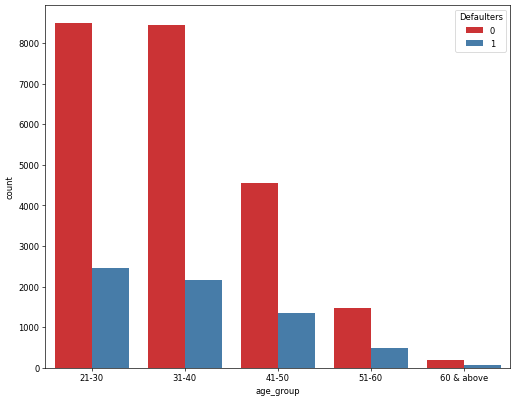

In [ ]:
#visualizing age group
plt.figure(figsize=(10,8),dpi=60)
sns.countplot(x=df['age_group'].sort_values(),data=df,hue='Defaulters', palette='Set1')

### obsevation:
- In aur dataset we can clearly see that most of the credit card holder are of age between 21 to 40 , so we can say that company's target customer are mostly youngster.


In [ ]:
#checking the dedfault ratio of age_group
df[['Defaulters','age_group']].groupby('age_group').mean().reset_index()

,age_group,Defaulters
0,21-30,0.224229
1,31-40,0.203564
2,41-50,0.230366
3,51-60,0.252798
4,60 & above,0.275194


### observation
- we can clearly see that as the age incearse , chances of the default increase as higher age persons has more default ratio.

In [ ]:
# drop age column because now we have age_group in our dataset
df=df.drop('AGE',axis=1)

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulters,multivariate_anomaly_score,multivariate_outlier,age_group
0,20000,2,2,1,2,2,-1,-1,-2,-2,...,0,689,0,0,0,0,1,0.190476,1,21-30
1,120000,2,2,2,-1,2,0,0,0,2,...,0,1000,1000,1000,0,2000,1,0.212437,1,21-30
2,90000,2,2,2,0,0,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,0.269715,1,31-40
3,50000,2,2,1,0,0,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,0.264108,1,31-40
4,50000,1,2,1,-1,0,-1,0,0,0,...,2000,36681,10000,9000,689,679,0,0.171549,1,51-60


In [ ]:
# Payment delay description
df[['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']].describe()

,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR
count,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000
mean,-0.023266,-0.140572,-0.172492,-0.226296,-0.271549,-0.296498
std,1.113858,1.189198,1.192044,1.166326,1.131761,1.148976
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [ ]:
#Previous Payment Description
df[['PAY_AMT_SEPT','PAY_AMT_AUG','PAY_AMT_JUL','PAY_AMT_JUN','PAY_AMT_MAY','PAY_AMT_APR']].describe()

,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
count,29700.000000,2.970000e+04,29700.000000,29700.000000,29700.000000,29700.000000
mean,5358.378047,5.406675e+03,4904.933434,4599.478047,4561.223973,4826.430943
std,14280.856685,1.613122e+04,14758.116252,14559.000559,14159.246540,15665.870251
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,990.000000,8.157500e+02,390.000000,283.750000,237.750000,100.000000
50%,2100.000000,2.000000e+03,1791.000000,1500.000000,1500.000000,1500.000000
75%,5000.000000,5.000000e+03,4360.000000,4000.000000,4000.000000,4000.000000
max,505000.000000,1.024516e+06,417588.000000,528897.000000,426529.000000,528666.000000


In [ ]:
# Bill Statement description
df[['BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR']].describe()

,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR
count,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000
mean,48179.994916,46164.947912,43873.935421,40258.277104,37494.355690,36265.737104
std,65642.197006,62954.356763,60427.570373,55956.697295,52716.217836,52097.663795
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3457.750000,2895.500000,2551.000000,2250.000000,1699.750000,1200.000000
50%,21706.000000,20650.000000,19779.500000,18783.000000,17860.000000,16703.500000
75%,64829.000000,61729.750000,58425.500000,52032.000000,49123.750000,48278.500000
max,746814.000000,512650.000000,855086.000000,628699.000000,514114.000000,499100.000000


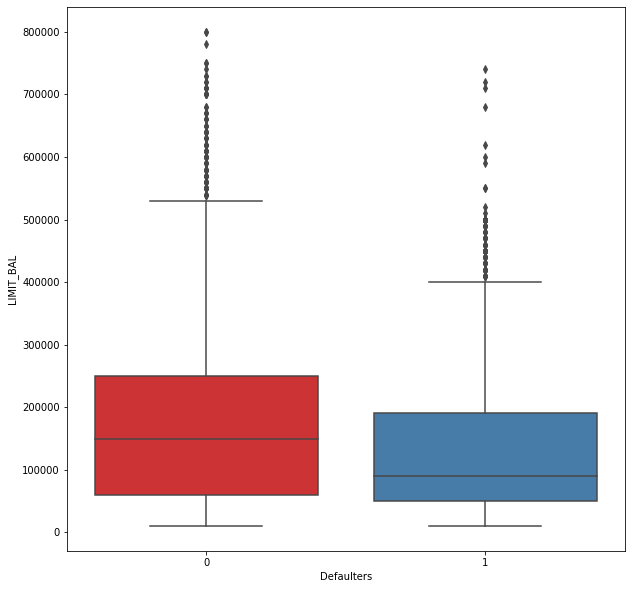

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Defaulters", y="LIMIT_BAL", data=df, palette='Set1')

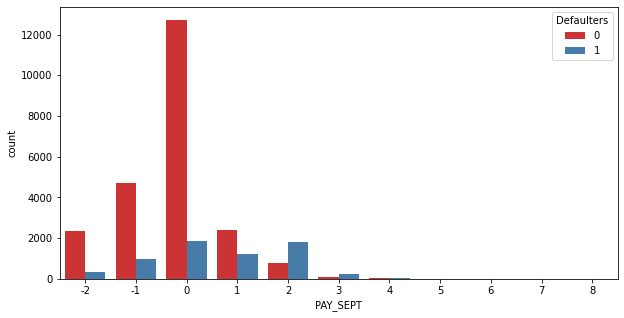

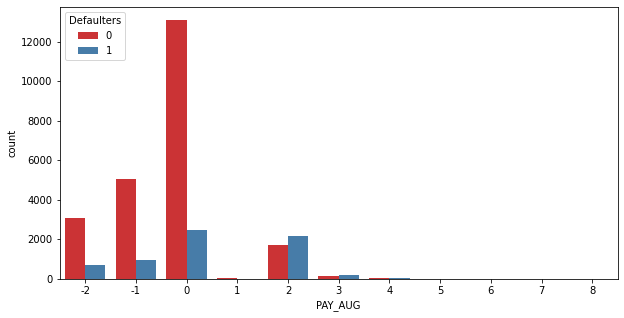

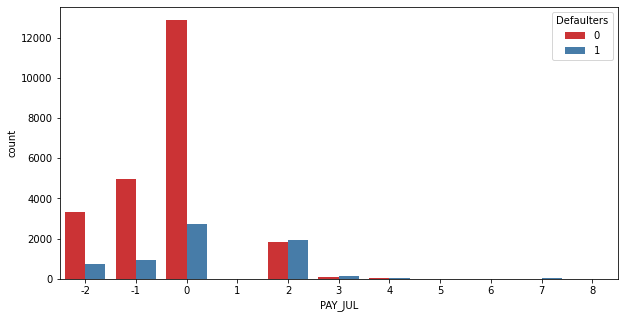

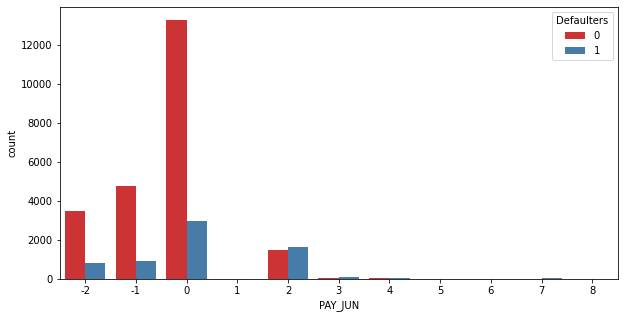

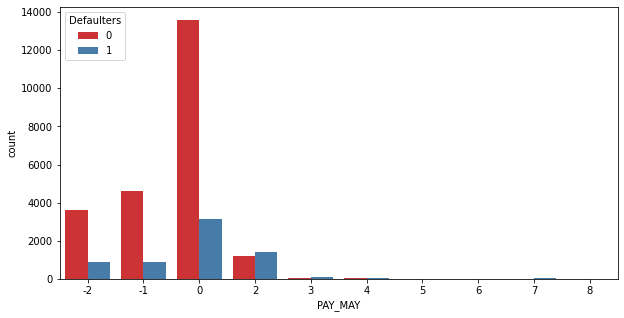

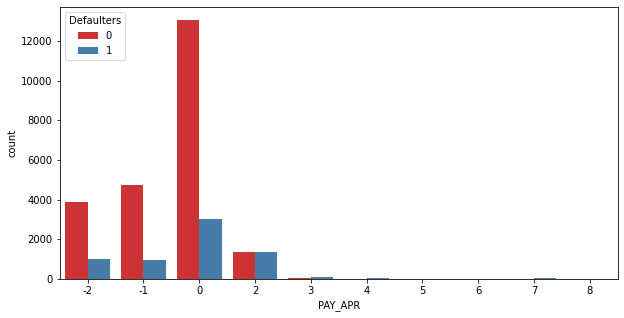

In [ ]:
pay_col = ['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'Defaulters', data = df, palette='Set1')

# 

In [ ]:
# checking info of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29700 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   29700 non-null  int64  
 1   SEX                         29700 non-null  int64  
 2   EDUCATION                   29700 non-null  int64  
 3   MARRIAGE                    29700 non-null  int64  
 4   PAY_SEPT                    29700 non-null  int64  
 5   PAY_AUG                     29700 non-null  int64  
 6   PAY_JUL                     29700 non-null  int64  
 7   PAY_JUN                     29700 non-null  int64  
 8   PAY_MAY                     29700 non-null  int64  
 9   PAY_APR                     29700 non-null  int64  
 10  BILL_AMT_SEPT               29700 non-null  int64  
 11  BILL_AMT_AUG                29700 non-null  int64  
 12  BILL_AMT_JUL                29700 non-null  int64  
 13  BILL_AMT_JUN                297

## Using SMOTE(Synthetic Minority Oversampling Technique) to remediate Imbalance in dependent column

In [ ]:
#spliting independent Variable
X=df.drop(['Defaulters','multivariate_anomaly_score','multivariate_outlier'],axis=1)

In [ ]:
#looking into independent variable
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,age_group
0,20000,2,2,1,2,2,-1,-1,-2,-2,...,0,0,0,0,689,0,0,0,0,21-30
1,120000,2,2,2,-1,2,0,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,21-30
2,90000,2,2,2,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,31-40
3,50000,2,2,1,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,31-40
4,50000,1,2,1,-1,0,-1,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,51-60


In [ ]:
#maping numerical value to categorical for easy understanding
X['SEX']=X['SEX'].map({1:'Male',2:'Female'})
X['EDUCATION']=X['EDUCATION'].map({1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'other',5:'other',6:'other',0:'other'})
X['MARRIAGE']=X['MARRIAGE'].map({1 : 'married', 2 : 'single', 3 : 'others',0 : 'others'})

In [ ]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,age_group
0,20000,Female,university,married,2,2,-1,-1,-2,-2,...,0,0,0,0,689,0,0,0,0,21-30
1,120000,Female,university,single,-1,2,0,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,21-30
2,90000,Female,university,single,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,31-40
3,50000,Female,university,married,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,31-40
4,50000,Male,university,married,-1,0,-1,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,51-60


In [ ]:
# one hot encoding for age group
X=pd.get_dummies(X)

In [ ]:
X.head()

,LIMIT_BAL,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,...,EDUCATION_other,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single,age_group_21-30,age_group_31-40,age_group_41-50,age_group_51-60,age_group_60 & above
0,20000,2,2,-1,-1,-2,-2,3913,3102,689,...,0,1,1,0,0,1,0,0,0,0
1,120000,-1,2,0,0,0,2,2682,1725,2682,...,0,1,0,0,1,1,0,0,0,0
2,90000,0,0,0,0,0,0,29239,14027,13559,...,0,1,0,0,1,0,1,0,0,0
3,50000,0,0,0,0,0,0,46990,48233,49291,...,0,1,1,0,0,0,1,0,0,0
4,50000,-1,0,-1,0,0,0,8617,5670,35835,...,0,1,1,0,0,0,0,0,1,0


In [ ]:
#spliting Dependent variable
y=df['Defaulters']

In [ ]:
df_final=X.copy()

In [ ]:
df_final.head()

,LIMIT_BAL,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,...,EDUCATION_other,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single,age_group_21-30,age_group_31-40,age_group_41-50,age_group_51-60,age_group_60 & above
0,20000,2,2,-1,-1,-2,-2,3913,3102,689,...,0,1,1,0,0,1,0,0,0,0
1,120000,-1,2,0,0,0,2,2682,1725,2682,...,0,1,0,0,1,1,0,0,0,0
2,90000,0,0,0,0,0,0,29239,14027,13559,...,0,1,0,0,1,0,1,0,0,0
3,50000,0,0,0,0,0,0,46990,48233,49291,...,0,1,1,0,0,0,1,0,0,0
4,50000,-1,0,-1,0,0,0,8617,5670,35835,...,0,1,1,0,0,0,0,0,1,0


In [ ]:
df_final['Defaulters']=df['Defaulters']

In [ ]:
df_final

,LIMIT_BAL,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,...,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single,age_group_21-30,age_group_31-40,age_group_41-50,age_group_51-60,age_group_60 & above,Defaulters
0,20000,2,2,-1,-1,-2,-2,3913,3102,689,...,1,1,0,0,1,0,0,0,0,1
1,120000,-1,2,0,0,0,2,2682,1725,2682,...,1,0,0,1,1,0,0,0,0,1
2,90000,0,0,0,0,0,0,29239,14027,13559,...,1,0,0,1,0,1,0,0,0,0
3,50000,0,0,0,0,0,0,46990,48233,49291,...,1,1,0,0,0,1,0,0,0,0
4,50000,-1,0,-1,0,0,0,8617,5670,35835,...,1,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,0,0,0,0,0,0,188948,192815,208365,...,0,1,0,0,0,1,0,0,0,0
29996,150000,-1,-1,-1,-1,0,0,1683,1828,3502,...,0,0,0,1,0,0,1,0,0,0
29997,30000,4,3,2,-1,0,0,3565,3356,2758,...,1,0,0,1,0,1,0,0,0,1
29998,80000,1,-1,0,0,0,-1,-1645,78379,76304,...,0,1,0,0,0,0,1,0,0,1


In [ ]:
#importing SMote to make our dataset balanced
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X,y)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 29700
Resampled dataset shape 46308


In [ ]:
#now checking the count of dependent variaable after balancing
(unique, counts) = np.unique(y_smote, return_counts=True)
np.asarray((unique, counts)).T

array([[    0, 23154],
       [    1, 23154]])

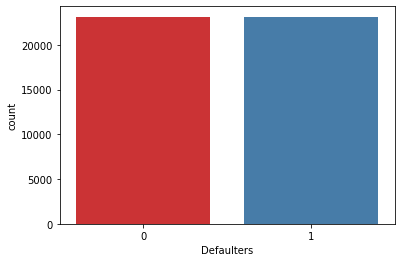

In [ ]:
sns.countplot(y_smote, palette='Set1')

## Train | Test Split

In [ ]:
#spliting data set into train and test dataset
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.25,random_state=101)

In [ ]:
#looking into independent variable of train dataset
X_train

,LIMIT_BAL,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,...,EDUCATION_other,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single,age_group_21-30,age_group_31-40,age_group_41-50,age_group_51-60,age_group_60 & above
33806,250000,0,-2,-2,-2,-2,-2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29971,53584,0,0,-1,-1,-1,-1,44979,1723,1231,...,0,0,0,0,1,1,0,0,0,0
453,180000,0,0,0,0,0,0,152510,151651,159019,...,0,1,1,0,0,0,1,0,0,0
21399,100000,1,2,0,0,0,2,7127,6867,8095,...,0,1,0,0,1,1,0,0,0,0
1652,290000,-1,-1,-1,-1,-1,0,1520,1200,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,30000,0,0,0,0,0,0,23819,15367,10159,...,0,1,1,0,0,0,1,0,0,0
8006,200000,-1,-1,0,0,0,0,1674,7398,6867,...,0,0,0,0,1,1,0,0,0,0
17745,10000,3,2,2,3,3,3,1050,1050,1050,...,0,1,1,0,0,0,1,0,0,0
17931,100000,0,0,0,0,0,0,81210,78785,69138,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
#Scaling Feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

# Creating Function

In [ ]:
model_accuracy=[]
model_precision=[]
model_recall=[]
model_f1_score=[]
model_roc_auc_score=[]


In [ ]:
# Creating Function to run diferent models
def run_and_evaluate_model(model,X_train,X_test,y_train,y_test, best_parameter=True, best_score=True):
  '''
  train the model and gives mse,rmse,r2,adj r2 score of the model
  can be used for any model where y is not transformed 
  '''

  start=time.time()
  #training the model
  model.fit(X_train,y_train)
  stop = time.time()

  time_min=round((stop - start)/60,4)
  print(f"Training time: {time_min}min",'\n')
  


  #predicting the values of y from x via model
  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  
  # Get the confusion matrix for both train and test
  from sklearn.metrics import confusion_matrix,classification_report

  def score (model,X,actual,predicted,append=True):
    accuracy = accuracy_score(actual,predicted)
    precision = precision_score(actual,predicted)
    recall = recall_score(actual,predicted)
    f1 = f1_score(actual,predicted)
    roc= roc_auc_score(actual,predicted)
    confusion_mat=confusion_matrix(actual,predicted)
    print("The accuracy is ", accuracy)
    print("The precision is ", precision)
    print("The recall is ", recall)
    print("The f1 is ", f1)
    print('the auc  is ',roc)
    print('\nconfusion_matrix \n ',confusion_mat)
    

    if append==True:
      model_accuracy.append(accuracy)
      model_precision.append(precision)
      model_recall.append(recall)
      model_f1_score.append(f1)
      model_roc_auc_score.append(roc)
    else:
      pass

  print('score matrix for train')
  print('*'*80)
  score(model=model,X=X_train,actual=y_train,predicted=y_pred_train,append=False)
  print('\nClassification Report\n')
  print(classification_report(y_train, y_pred_train))
  print('\n')
  print('score matrix for test')
  print('*'*80)
  score(model=model,X=X_test,actual=y_test,predicted=y_pred_test)
  print('\nClassification Report\n')
  print(classification_report(y_test, y_pred_test))


In [ ]:
#  importing lime 
import lime
import lime.lime_tabular

In [ ]:
# LIME SECTION

def LimeTabularExplainer_table(model,instance,num_features,dependent_var):
  # creating a data frame to store all the independent features
  X=df_final.drop(dependent_var,axis=1)
  # fetching all the features name from independent variable
  feature_names =list(X.columns)

  # setting up the lime tablular 
  explainer = lime.lime_tabular.LimeTabularExplainer(X.values,feature_names=feature_names,mode='classification')

  # selecting the instace to explain
  choosen_instance = X.reset_index(drop=True).loc[[instance]].values[0]
  exp = explainer.explain_instance(choosen_instance, model.predict_proba, num_features=num_features)
  # showing the lime graph on the screen 
  exp.show_in_notebook(show_table=True)


# creating function to get feature importance 

In [ ]:
#creating function to get features importance of all the tree based model
def get_features_importance(optimal_model,X_train):
  imp_feat=pd.DataFrame(index=X.columns,data=optimal_model.feature_importances_,columns=['importance'])
  imp_feat=imp_feat[imp_feat['importance']>0]
  imp_feat=imp_feat.sort_values('importance')
  plt.figure(figsize=(15,5))
  print(f'==========================Features Importance============================\n\n {optimal_model}\
  \n=========================================================================\n') 
  sns.barplot(data=imp_feat,x=imp_feat.index,y='importance')
  plt.xticks(rotation=90);
   

# Logistic Regression

In [ ]:
# import Loggistic Regression
from sklearn.linear_model import LogisticRegression

In [ ]:
#creating Instance of Logistic Regression

log_model= LogisticRegression()

In [ ]:
#running and evaluating log_model using function ccreated
run_and_evaluate_model(log_model,scaled_X_train,scaled_X_test,y_train,y_test)

Training time: 0.0108min 

score matrix for train
********************************************************************************
The accuracy is  0.8648181739656214
The precision is  0.9537842305757206
The recall is  0.766077820113151
The f1 is  0.8496878501680807
the auc  is  0.8645714506964743

confusion_matrix 
  [[16766   643]
 [ 4052 13270]]

Classification Report

              precision    recall  f1-score   support

           0       0.81      0.96      0.88     17409
           1       0.95      0.77      0.85     17322

    accuracy                           0.86     34731
   macro avg       0.88      0.86      0.86     34731
weighted avg       0.88      0.86      0.86     34731



score matrix for test
********************************************************************************
The accuracy is  0.8637816360024186
The precision is  0.952755905511811
The recall is  0.7676611796982168
The f1 is  0.8502516380210807
the auc  is  0.8645094410240431

confusion_matrix 
  [[55

### implementing GridSearch for Hyperparameter Tuning

In [ ]:
# creating param dict for hyperparameter tuning
param_dict= {'C': [0.001,0.01,0.1,1,10,100],'penalty': ['l1', 'l2'],'max_iter':[1000]} 

In [ ]:
#creating Grid model to perform grid search

grid_log_model = GridSearchCV(log_model, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall') 

In [ ]:
#running and evaluating grid_log_model using function ccreated
run_and_evaluate_model(grid_log_model,scaled_X_train,scaled_X_test,y_train,y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Training time: 0.1532min 

score matrix for train
********************************************************************************
The accuracy is  0.8651636866200224
The precision is  0.9506524994651644
The recall is  0.7695993534233923
The f1 is  0.8505981815281544
the auc  is  0.8649248992977149

confusion_matrix 
  [[16717   692]
 [ 3991 13331]]

Classification Report

              precision    recall  f1-score   support

           0       0.81      0.96      0.88     17409
           1       0.95      0.77      0.85     17322

    accuracy                           0.87     34731
   macro avg       0.88      0.86      0.86     34731
weighted avg       0.88      0.87      0.86     34731



score matrix for test
********************************************************************************
The accuracy is  0.8649909302928219
The precision is  0.9502214722632356
The recall is  0.7724622770919067
The f1 is  0.85217062328

In [ ]:
#getting the coeficient of best estimator
grid_log_model.best_estimator_.coef_

array([[-5.57863846e-02,  5.74999396e-01,  1.03989576e-01,
         6.09127857e-02,  2.51971683e-02,  6.96723836e-02,
        -8.99234371e-04, -2.82331870e-01,  3.52489200e-02,
         1.35226033e-01, -1.68689051e-02,  9.07250628e-03,
         4.17336032e-03, -1.83447787e-01, -1.75424602e-01,
        -3.76894725e-02, -5.18462681e-02, -6.42717859e-02,
        -6.23358714e-02, -1.24921262e+00, -1.13554490e+00,
        -1.12405643e+00, -8.88378272e-01, -3.66917923e-01,
        -1.26304751e+00, -1.08410973e+00, -2.35388362e-01,
        -1.19784387e+00, -1.28258019e+00, -1.23083643e+00,
        -9.72117064e-01, -5.98955799e-01, -1.94876832e-01]])

In [ ]:
optimal_log_model=grid_log_model.best_estimator_.coef_

In [ ]:
#ccreating dataframe for feature imp
feature_importance = pd.DataFrame({'Features':X.columns, 'Importance':np.abs(optimal_log_model).ravel() })

In [ ]:
#sorting the feat impt df by importance
imp_feat = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

In [ ]:
imp_feat

,Features,Importance
28,age_group_21-30,1.282580
24,EDUCATION_university,1.263048
19,SEX_Female,1.249213
29,age_group_31-40,1.230836
27,MARRIAGE_single,1.197844
20,SEX_Male,1.135545
21,EDUCATION_graduate school,1.124056
25,MARRIAGE_married,1.084110
30,age_group_41-50,0.972117
22,EDUCATION_high school,0.888378


==========================Features Importance============================

 [[-5.57863846e-02  5.74999396e-01  1.03989576e-01  6.09127857e-02
   2.51971683e-02  6.96723836e-02 -8.99234371e-04 -2.82331870e-01
   3.52489200e-02  1.35226033e-01 -1.68689051e-02  9.07250628e-03
   4.17336032e-03 -1.83447787e-01 -1.75424602e-01 -3.76894725e-02
  -5.18462681e-02 -6.42717859e-02 -6.23358714e-02 -1.24921262e+00
  -1.13554490e+00 -1.12405643e+00 -8.88378272e-01 -3.66917923e-01
  -1.26304751e+00 -1.08410973e+00 -2.35388362e-01 -1.19784387e+00
  -1.28258019e+00 -1.23083643e+00 -9.72117064e-01 -5.98955799e-01
  -1.94876832e-01]]



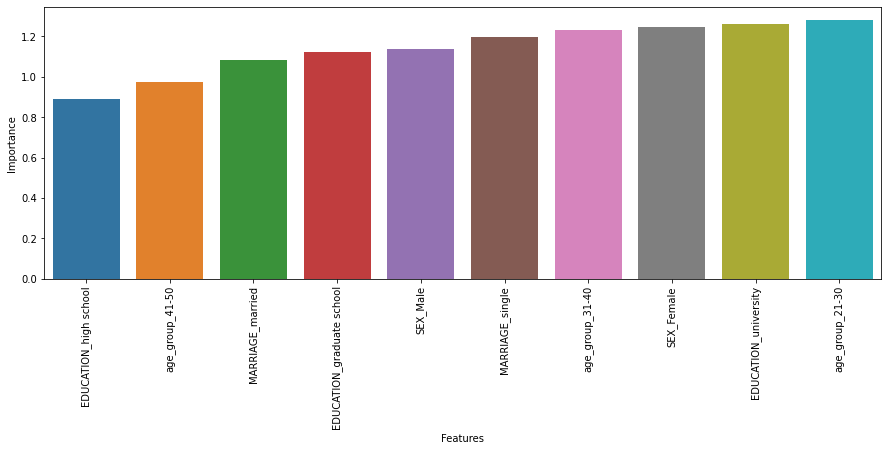

In [ ]:
#visualizing the feature importance
imp_feat=imp_feat[imp_feat['Importance']>0]
imp_feat=imp_feat.sort_values('Importance')
plt.figure(figsize=(15,5))
print(f'==========================Features Importance============================\n\n {optimal_log_model}\
\n=========================================================================\n') 
sns.barplot(data=imp_feat,x=imp_feat.Features,y='Importance')
plt.xticks(rotation=90);

In [ ]:
#geting the best Paramater of model
grid_log_model.best_params_

{'C': 0.01, 'max_iter': 1000, 'penalty': 'l2'}

# Decision Tree

In [ ]:
#impoting decisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# creating DecisionTree model
DecisionTree = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=45,criterion='entropy')

# training and evaluating the DecisionTree
run_and_evaluate_model(DecisionTree,X_train, X_test, y_train, y_test)

Training time: 0.0161min 

score matrix for train
********************************************************************************
The accuracy is  0.8251418041519104
The precision is  0.9009195238434671
The recall is  0.7296501558711466
The f1 is  0.8062900704921694
the auc  is  0.8249031984479519

confusion_matrix 
  [[16019  1390]
 [ 4683 12639]]

Classification Report

              precision    recall  f1-score   support

           0       0.77      0.92      0.84     17409
           1       0.90      0.73      0.81     17322

    accuracy                           0.83     34731
   macro avg       0.84      0.82      0.82     34731
weighted avg       0.84      0.83      0.82     34731



score matrix for test
********************************************************************************
The accuracy is  0.8205925542022977
The precision is  0.8961806288246466
The recall is  0.7282235939643347
The f1 is  0.8035190615835778
the auc  is  0.8212919536401307

confusion_matrix 
  [[

In [ ]:
DecisionTree.feature_importances_

array([0.00226061, 0.23221068, 0.096319  , 0.        , 0.00199507,
       0.00319836, 0.00517587, 0.        , 0.00316149, 0.        ,
       0.        , 0.00807411, 0.        , 0.00623699, 0.02059459,
       0.00685258, 0.00229506, 0.        , 0.        , 0.0169466 ,
       0.12322724, 0.01026084, 0.03357665, 0.01780458, 0.01504032,
       0.25065042, 0.05920465, 0.05863597, 0.00536447, 0.00482133,
       0.01136261, 0.00472989, 0.        ])

==========================Features Importance============================

 DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=45)  



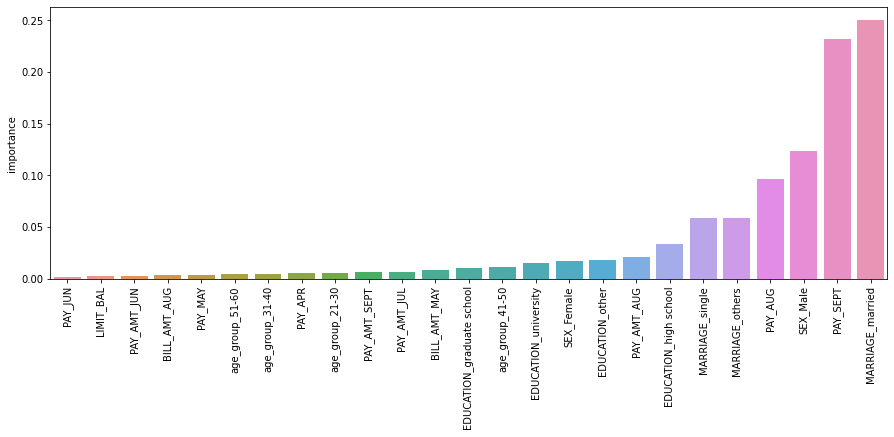

In [ ]:
get_features_importance(DecisionTree,X_train)

# Random Forest

In [ ]:
#importing Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier()

In [ ]:
# training and evaluating the Random forest
run_and_evaluate_model(rfc_model,X_train, X_test, y_train, y_test)

Training time: 0.1276min 

score matrix for train
********************************************************************************
The accuracy is  0.9981572658431949
The precision is  0.9988437969707481
The recall is  0.9974598776122849
The f1 is  0.9981513575967648
the auc  is  0.9981555232739465

confusion_matrix 
  [[17389    20]
 [   44 17278]]

Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17409
           1       1.00      1.00      1.00     17322

    accuracy                           1.00     34731
   macro avg       1.00      1.00      1.00     34731
weighted avg       1.00      1.00      1.00     34731



score matrix for test
********************************************************************************
The accuracy is  0.8788978146324609
The precision is  0.9115570419918246
The recall is  0.8412208504801097
The f1 is  0.8749777064383807
the auc  is  0.8791830971286537

confusion_matrix 
  [[

### implementing gridsearch for hyperparameter tuning in Random Forest

In [ ]:
# finding the best parameters for rfc_model by gridsearchcv
grid_values = {'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
grid_rfc_model = GridSearchCV(estimator=rfc_model,param_grid = grid_values, scoring='balanced_accuracy',cv=3,verbose=5,n_jobs=-1)

In [ ]:
# training and evaluating the Random forest with hyperparameter tuing
run_and_evaluate_model(grid_rfc_model,X_train, X_test, y_train, y_test)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Training time: 2.7704min 

score matrix for train
********************************************************************************
The accuracy is  0.9444588408050445
The precision is  0.9843917175404368
The recall is  0.902955778778432
The f1 is  0.9419168347836561
the auc  is  0.9443551367899857

confusion_matrix 
  [[17161   248]
 [ 1681 15641]]

Classification Report

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     17409
           1       0.98      0.90      0.94     17322

    accuracy                           0.94     34731
   macro avg       0.95      0.94      0.94     34731
weighted avg       0.95      0.94      0.94     34731



score matrix for test
********************************************************************************
The accuracy is  0.872160317871642
The precision is  0.9068810770381451
The recall is  0.8316186556927297
The f1 is  0.86762075134168

In [ ]:
#getting the best paramater of random forest
grid_rfc_model.best_params_

{'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 150}

In [ ]:
#getting the best estimator for random forest
grid_rfc_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=150)

In [ ]:
#storing best estimator in varibale
optimal__rfc_model=grid_rfc_model.best_estimator_

==========================Features Importance============================

 RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=150)  



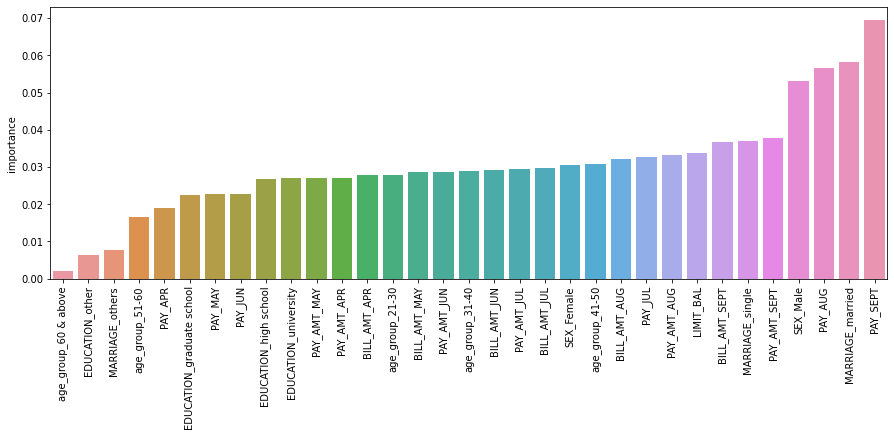

In [ ]:
#visualizing the feature importance of variable for random forest
get_features_importance(optimal__rfc_model,X_train)

# Support Vector Machine

In [ ]:
#importing SVM
from sklearn.svm import SVC
svc_model=SVC()

In [ ]:
# training and evaluating the SVC model 
run_and_evaluate_model(svc_model,scaled_X_train,scaled_X_test,y_train,y_test)

Training time: 0.7797min 

score matrix for train
********************************************************************************
The accuracy is  0.8735423684892459
The precision is  0.9465395772896809
The recall is  0.7911326636647038
The f1 is  0.8618867924528302
the auc  is  0.8733364507363671

confusion_matrix 
  [[16635   774]
 [ 3618 13704]]

Classification Report

              precision    recall  f1-score   support

           0       0.82      0.96      0.88     17409
           1       0.95      0.79      0.86     17322

    accuracy                           0.87     34731
   macro avg       0.88      0.87      0.87     34731
weighted avg       0.88      0.87      0.87     34731



score matrix for test
********************************************************************************
The accuracy is  0.8690507039820333
The precision is  0.9423944239442394
The recall is  0.7882373113854595
The f1 is  0.8584500466853409
the auc  is  0.8696626069546965

confusion_matrix 
  [[

### Hyperparameter tuning for SVM

In [ ]:
params={'C':[0.1,1,10],'kernel':['rbf']}
svc_grid_model= GridSearchCV(svc_model,param_grid=params,scoring='recall')

In [ ]:
run_and_evaluate_model(svc_grid_model,scaled_X_train,scaled_X_test,y_train,y_test)

Training time: 11.4999min 

score matrix for train
********************************************************************************
The accuracy is  0.8897814632460914
The precision is  0.954282251548613
The recall is  0.8182080591155756
The f1 is  0.8810219431839375
the auc  is  0.889602622239734

confusion_matrix 
  [[16730   679]
 [ 3149 14173]]

Classification Report

              precision    recall  f1-score   support

           0       0.84      0.96      0.90     17409
           1       0.95      0.82      0.88     17322

    accuracy                           0.89     34731
   macro avg       0.90      0.89      0.89     34731
weighted avg       0.90      0.89      0.89     34731



score matrix for test
********************************************************************************
The accuracy is  0.8675822752008292
The precision is  0.9306752153876978
The recall is  0.7964677640603567
The f1 is  0.8583572022544582
the auc  is  0.8681207401676891

confusion_matrix 
  [[5

In [ ]:
#getting the best estimator
svc_grid_model.best_estimator_

SVC(C=10)

In [ ]:
#getting the best parameter
svc_grid_model.best_params_

{'C': 10, 'kernel': 'rbf'}

---
#XGboost
---

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# creating XGBRegressor model
xgboost_model=XGBClassifier()

In [ ]:
# training and evaluating the Xgboost model
run_and_evaluate_model(xgboost_model,X_train,X_test,y_train,y_test)

Training time: 0.0676min 

score matrix for train
********************************************************************************
The accuracy is  0.8716708416112406
The precision is  0.92874758381657
The recall is  0.8044105761459416
The f1 is  0.8621191028615622
the auc  is  0.871502777877095

confusion_matrix 
  [[16340  1069]
 [ 3388 13934]]

Classification Report

              precision    recall  f1-score   support

           0       0.83      0.94      0.88     17409
           1       0.93      0.80      0.86     17322

    accuracy                           0.87     34731
   macro avg       0.88      0.87      0.87     34731
weighted avg       0.88      0.87      0.87     34731



score matrix for test
********************************************************************************
The accuracy is  0.8712101580720394
The precision is  0.9278533412182141
The recall is  0.8070987654320988
The f1 is  0.863273727647868
the auc  is  0.8716955968152662

confusion_matrix 
  [[5379

### Hyperparameter tuning for Xgboost

In [ ]:
# finding the best parameters for XGBRegressor by gridsearchcv
params={'n_estimators': [50,100,150],'max_depth': [3,5,9]}
grid_xgboost_model=GridSearchCV(estimator=xgboost_model,param_grid=params,cv=5,scoring='recall',verbose=5,n_jobs=-1)

In [ ]:
# training and evaluating the xgb_grid
run_and_evaluate_model(grid_xgboost_model,X_train,X_test,y_train,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Training time: 4.3521min 

score matrix for train
********************************************************************************
The accuracy is  0.9448043534594455
The precision is  0.9850135381902902
The recall is  0.9030712388869645
The f1 is  0.9422642532301297
the auc  is  0.94470007461035

confusion_matrix 
  [[17171   238]
 [ 1679 15643]]

Classification Report

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     17409
           1       0.99      0.90      0.94     17322

    accuracy                           0.94     34731
   macro avg       0.95      0.94      0.94     34731
weighted avg       0.95      0.94      0.94     34731



score matrix for test
********************************************************************************
The accuracy is  0.8810572687224669
The precision is  0.9301023363583704
The recall is  0.825960219478738
The f1 is  0.874943238579602

In [ ]:
#getting the best estimator
grid_xgboost_model.best_estimator_

XGBClassifier(max_depth=9, n_estimators=150)

In [ ]:
optimal_xgboost_model=grid_xgboost_model.best_estimator_

==========================Features Importance============================

 XGBClassifier(max_depth=9, n_estimators=150)  



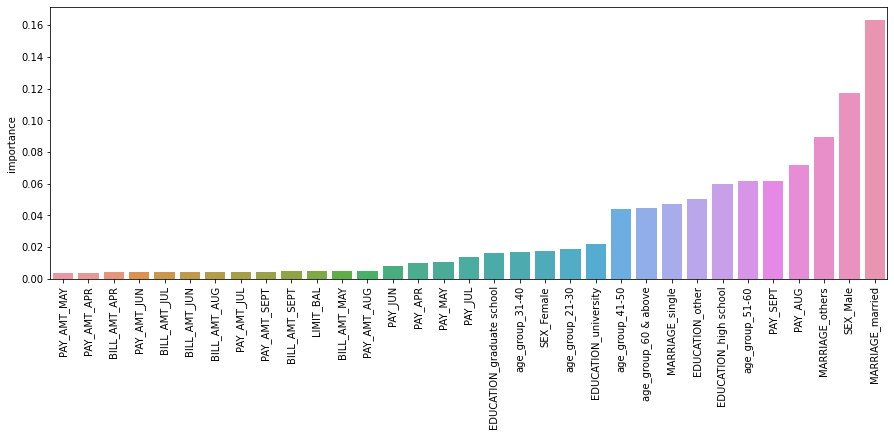

In [ ]:
#visaulizing feature importance
get_features_importance(optimal_xgboost_model,X_train)

---
# CatBoost
---

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.6 MB 64 kB/s 


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
cb_model=CatBoostClassifier(verbose=0)

In [ ]:
cb_model=CatBoostClassifier()

In [ ]:
# training and evaluating the cb model
run_and_evaluate_model(cb_model,X_train,X_test,y_train,y_test)

Learning rate set to 0.046862
0:	learn: 0.6498093	total: 62.1ms	remaining: 1m 2s
1:	learn: 0.6135886	total: 75.3ms	remaining: 37.6s
2:	learn: 0.5881048	total: 87ms	remaining: 28.9s
3:	learn: 0.5733798	total: 99.3ms	remaining: 24.7s
4:	learn: 0.5517622	total: 112ms	remaining: 22.2s
5:	learn: 0.5379630	total: 124ms	remaining: 20.6s
6:	learn: 0.5206075	total: 135ms	remaining: 19.2s
7:	learn: 0.5095115	total: 148ms	remaining: 18.4s
8:	learn: 0.4897599	total: 160ms	remaining: 17.6s
9:	learn: 0.4751200	total: 171ms	remaining: 17s
10:	learn: 0.4675317	total: 184ms	remaining: 16.6s
11:	learn: 0.4611289	total: 201ms	remaining: 16.5s
12:	learn: 0.4540984	total: 213ms	remaining: 16.1s
13:	learn: 0.4505312	total: 228ms	remaining: 16.1s
14:	learn: 0.4450918	total: 240ms	remaining: 15.8s
15:	learn: 0.4352877	total: 253ms	remaining: 15.5s
16:	learn: 0.4307021	total: 265ms	remaining: 15.3s
17:	learn: 0.4279550	total: 277ms	remaining: 15.1s
18:	learn: 0.4228866	total: 289ms	remaining: 14.9s
19:	learn: 

### Hyperparameter tuning for Catboost

In [ ]:
# finding the best parameters for XGBRegressor by gridsearchcv
params={'n_estimators': [50,100,150],'max_depth': [3,5,9]}
grid_cb_model=GridSearchCV(estimator=cb_model,param_grid=params,cv=3,scoring='recall',verbose=0,n_jobs=-1)

In [ ]:
# training and evaluating the catboost model with hyperparameter tuing
run_and_evaluate_model(grid_cb_model,X_train,X_test,y_train,y_test)

Learning rate set to 0.387097
0:	learn: 0.4850609	total: 40ms	remaining: 3.96s
1:	learn: 0.3999533	total: 73.4ms	remaining: 3.6s
2:	learn: 0.3513578	total: 105ms	remaining: 3.41s
3:	learn: 0.3339922	total: 137ms	remaining: 3.29s
4:	learn: 0.3252107	total: 169ms	remaining: 3.21s
5:	learn: 0.3110487	total: 204ms	remaining: 3.2s
6:	learn: 0.3079796	total: 236ms	remaining: 3.13s
7:	learn: 0.3048539	total: 268ms	remaining: 3.08s
8:	learn: 0.3022896	total: 299ms	remaining: 3.02s
9:	learn: 0.3006646	total: 329ms	remaining: 2.96s
10:	learn: 0.2976348	total: 362ms	remaining: 2.93s
11:	learn: 0.2954072	total: 392ms	remaining: 2.88s
12:	learn: 0.2892511	total: 428ms	remaining: 2.87s
13:	learn: 0.2875375	total: 461ms	remaining: 2.83s
14:	learn: 0.2862206	total: 502ms	remaining: 2.84s
15:	learn: 0.2847879	total: 535ms	remaining: 2.81s
16:	learn: 0.2825099	total: 569ms	remaining: 2.78s
17:	learn: 0.2792141	total: 601ms	remaining: 2.74s
18:	learn: 0.2761178	total: 635ms	remaining: 2.71s
19:	learn: 0.

In [ ]:
#getting the best estimator
optimal_catboost_model=grid_cb_model.best_estimator_

In [ ]:
#getting the featre importance
grid_cb_model.best_estimator_.feature_importances_

array([ 2.59953965,  2.75415393,  1.48565606,  0.71820711,  0.6505837 ,
        1.05674996,  0.51570508,  1.81178817,  0.72813817,  1.09621376,
        0.9931602 ,  0.85592972,  0.93200605,  2.0280253 ,  1.37123249,
        1.38339428,  1.59286315,  1.39826277,  1.90617938,  5.0091145 ,
        4.57169741, 13.3109567 ,  9.80283652,  2.04824119, 15.40021002,
        5.62745515,  0.65487694,  6.33765072,  3.65979294,  3.5755574 ,
        2.73190975,  1.29564252,  0.09626931])

==========================Features Importance============================




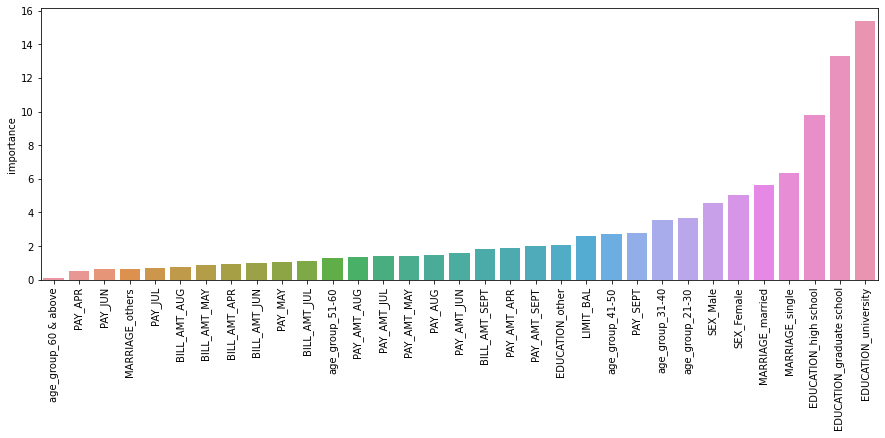

In [ ]:
# visualizing feature importance
get_features_importance(optimal_catboost_model,X_train)

In [ ]:
grid_cb_model.best_params_

{'max_depth': 9, 'n_estimators': 100}

---
# LightGBM
---

In [ ]:
import lightgbm as lgb

In [ ]:
lgbc=lgb.LGBMClassifier()

In [ ]:
# training and evaluating the lgbr_grid
run_and_evaluate_model(lgbc,X_train,X_test,y_train,y_test)

Training time: 0.0166min 

score matrix for train
********************************************************************************
The accuracy is  0.8877371800408856
The precision is  0.9472842385871376
The recall is  0.8205749913404918
The f1 is  0.8793887462492652
the auc  is  0.8875693613718943

confusion_matrix 
  [[16618   791]
 [ 3108 14214]]

Classification Report

              precision    recall  f1-score   support

           0       0.84      0.95      0.90     17409
           1       0.95      0.82      0.88     17322

    accuracy                           0.89     34731
   macro avg       0.89      0.89      0.89     34731
weighted avg       0.89      0.89      0.89     34731



score matrix for test
********************************************************************************
The accuracy is  0.8780340329964585
The precision is  0.9352107128790863
The recall is  0.8143004115226338
The f1 is  0.8705774518790101
the auc  is  0.8785166113313778

confusion_matrix 
  [[

In [ ]:
# finding the best parameters for XGBRegressor by gridsearchcv
lgbc_para={'n_estimators': [100,125,150],'max_depth': [7,10,15]}
lgbc_grid=GridSearchCV(estimator=lgbc,param_grid=lgbc_para,cv=3,scoring='recall',verbose=5,n_jobs=-1)

In [ ]:
# training and evaluating the lgbr_grid
run_and_evaluate_model(lgbc_grid,X_train,X_test,y_train,y_test)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Training time: 0.3561min 

score matrix for train
********************************************************************************
The accuracy is  0.8961446546313092
The precision is  0.9553150521213731
The recall is  0.8306200207828195
The f1 is  0.8886143964425779
the auc  is  0.8959809277330147

confusion_matrix 
  [[16736   673]
 [ 2934 14388]]

Classification Report

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     17409
           1       0.96      0.83      0.89     17322

    accuracy                           0.90     34731
   macro avg       0.90      0.90      0.90     34731
weighted avg       0.90      0.90      0.90     34731



score matrix for test
********************************************************************************
The accuracy is  0.8776885203420576
The precision is  0.9349881796690307
The recall is  0.8137860082304527
The f1 is  0.870187018701

==========================Features Importance============================

 LGBMClassifier(max_depth=15, n_estimators=150)  



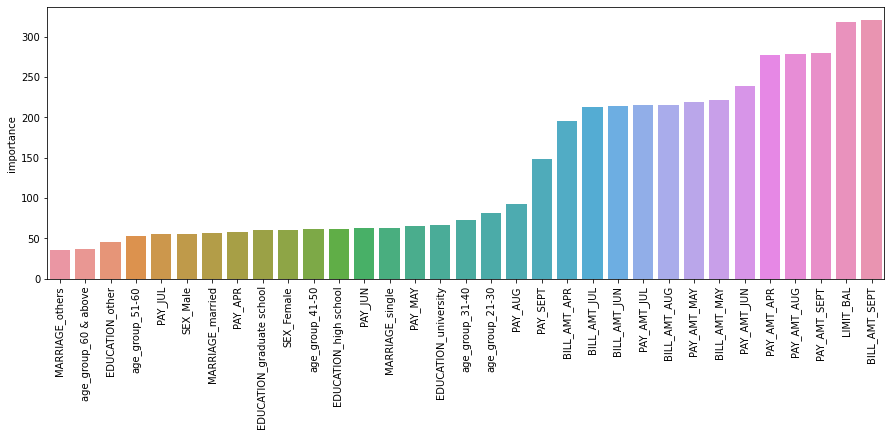

In [ ]:
get_features_importance(lgbc_grid.best_estimator_,X_train)

# Model's Score matrix

In [ ]:
#creating dictionary to store all the metrices 
dict={'accuracy':model_accuracy,'precision':model_precision,'recall':model_recall,'f1':model_f1_score,'roc_auc':model_roc_auc_score}

In [ ]:
# list of all models
model_name=['Logestic Regrestion','grid_log_regg','Desision Tree','Random forest','grid random forest','SVM','Grid SVM','XGboost','Grid Xgboost','CATBoost','Grid Catboost','LightGBM','Grid LightGBM']

In [ ]:
# converting dictionary to dataframe
matrix_df=pd.DataFrame.from_dict(dict,orient="index",columns=model_name)

In [ ]:
# taking the transpose of the dataframe to make it more visual appealing
matrix_df=matrix_df.transpose().reset_index().rename(columns={'index':'Models'})

In [ ]:
matrix_df

,Models,accuracy,precision,recall,f1,roc_auc
0,Logestic Regrestion,0.863782,0.952756,0.767661,0.850252,0.864509
1,grid_log_regg,0.864991,0.950221,0.772462,0.852171,0.865692
2,Desision Tree,0.820593,0.896181,0.728224,0.803519,0.821292
3,Random forest,0.878898,0.911557,0.841221,0.874978,0.879183
4,grid random forest,0.872160,0.906881,0.831619,0.867621,0.872467
5,SVM,0.869051,0.942394,0.788237,0.858450,0.869663
6,Grid SVM,0.867582,0.930675,0.796468,0.858357,0.868121
7,XGboost,0.871210,0.927853,0.807099,0.863274,0.871696
8,Grid Xgboost,0.881057,0.930102,0.825960,0.874943,0.881474
9,CATBoost,0.877084,0.930651,0.816872,0.870058,0.877540


# LIME
---

In [ ]:
LimeTabularExplainer_table(grid_rfc_model.best_estimator_,instance=2,num_features=5,dependent_var='Defaulters')

# ROC curve for all the models
---

In [ ]:
log_reg_best=grid_log_model.best_estimator_
rfc_best=grid_rfc_model.best_estimator_
xgbc_best=grid_xgboost_model.best_estimator_
cat_best=grid_cb_model.best_estimator_
lgbc_best=lgbc_grid.best_estimator_



In [ ]:
y_preds_proba_lr = log_reg_best.predict_proba(scaled_X_test)[::,1]
y_preds_proba_dt = DecisionTree.predict_proba(X_test)[::,1]
y_preds_proba_rfc = rfc_best.predict_proba(X_test)[::,1]
y_preds_proba_xgbc = xgbc_best.predict_proba(X_test)[::,1]
y_preds_proba_cat = cat_best.predict_proba(X_test)[::,1]
y_preds_proba_lgbc = lgbc_best.predict_proba(X_test)[::,1]


In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
classifiers_proba = [(log_reg_best, y_preds_proba_lr), 
                    (DecisionTree, y_preds_proba_dt), 
                    (rfc_best, y_preds_proba_rfc),
                    (xgbc_best, y_preds_proba_xgbc),
                    (cat_best, y_preds_proba_cat),
                    (lgbc_best, y_preds_proba_lgbc)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

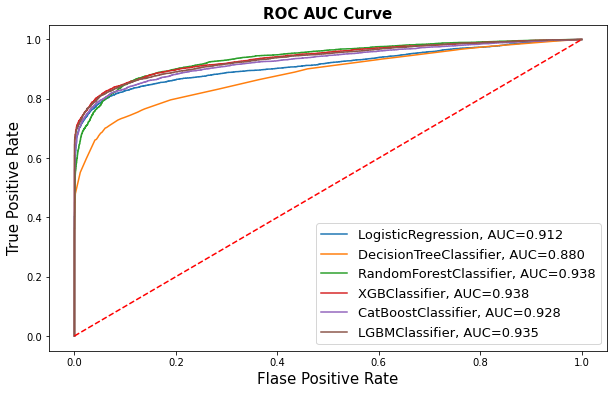

In [ ]:
fig = plt.figure(figsize=(10,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1],'r--')

plt.xlabel("Flase Positive Rate", fontsize=15)

plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC AUC Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

## Conclusion

❑ The default rate is higher for males, increases as the education increases,
also increases as the age of a person increases. i.e clients whose age
over 60 was higher than mid-age and young people.<br>
❑ In all of these models, our recall revolves in the range of 76 to 84%.with
the best fit model as random forest.<br>
❑ XGBoost and Random Forest performed the best with the highest
accuracy on 88% and an optimal value of Precision and Recall.<br>
❑ However Random forest is highly recommendable with equivalued values
of precision, recall and f1-score